# Examples of ReGraph versioning (VersionedGraph and VersionedHierarchy)

ReGraph implements a framework for version control of graph transformations

- Commit 
- Branch
- Merge branches
- Rollback

In [1]:
import networkx as nx

from regraph.audit import VersionedGraph
from regraph.rules import Rule
from regraph import print_graph, plot_rule, plot_graph

Create a graph and pass it to the VersionedGraph wrapper that will take care of the version control.

In [2]:
graph_obj = nx.DiGraph()
g = VersionedGraph(graph_obj)

Now let's create a rule that adds to the graph two nodes connected with an edge and apply it. If we want the changes to be commited to the version control we rewrite through the `rewrite` method of a `VersioneGraph` object.

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


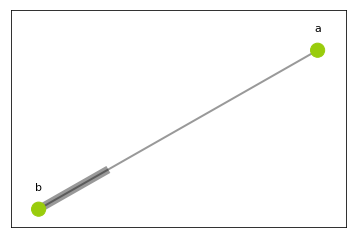

{'a': array([0.81576487, 1.        ]), 'b': array([0., 0.])}

In [3]:
rule = Rule.from_transform(nx.DiGraph())
rule.inject_add_node("a")
rule.inject_add_node("b")
rule.inject_add_edge("a", "b")

rhs_instance, _ = g.rewrite(rule, {}, message="Add a -> b")
plot_graph(g.graph)

We create a new branch called "branch"

In [4]:
branch_commit = g.branch("branch")

In [5]:
print("Branches: ", g.branches())
print("Current branch '{}'".format(g.current_branch()))

Branches:  ['master', 'branch']
Current branch 'branch'


Apply a rule that clones the node 'b' to the current vesion of the graph (branch 'branch')

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


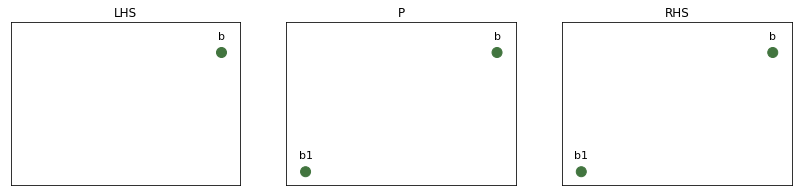

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:


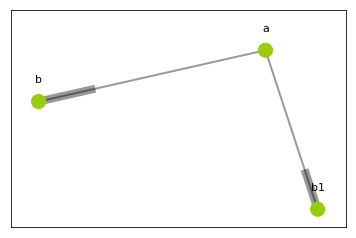

{'a': array([0.81308415, 0.83602361]),
 'b': array([0.        , 0.56626938]),
 'b1': array([1., 0.])}

In [6]:
pattern = nx.DiGraph()
pattern.add_node("b")
rule = Rule.from_transform(pattern)
rule.inject_clone_node("b")
plot_rule(rule)

g.rewrite(rule, {"b": rhs_instance["b"]}, message="Clone b")
plot_graph(g.graph)

Switch back to the 'master' branch

In [7]:
g.switch_branch("master")
print(g.current_branch())

master


Apply a rule that adds a loop form 'a' to itself, a new node 'c' and connects it with 'a'

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


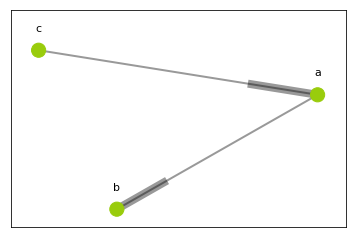

{'a': array([0.7501365 , 0.71962321]),
 'b': array([0.2103961, 0.       ]),
 'c': array([0., 1.])}

In [8]:
pattern = nx.DiGraph()
pattern.add_node("a")
rule = Rule.from_transform(pattern)
rule.inject_add_node("c")
rule.inject_add_edge("c", "a")
rule.inject_add_edge("a", "a")

rhs_instance, _ = g.rewrite(rule, {"a": rhs_instance["a"]}, message="Add c and c->a")
plot_graph(g.graph)

Create a new branch 'dev'

In [9]:
g.branch("dev")

'468784d9-0311-4d45-a2c0-499d69d5ab04'

In this branch remove an edge from 'c' to 'a' and merge two nodes together

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


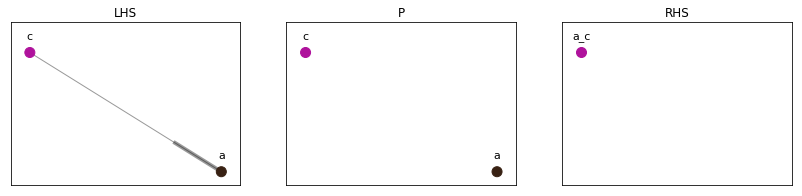

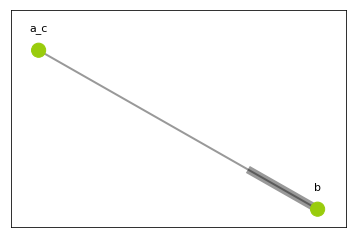

{'b': array([1., 0.]), 'a_c': array([0.        , 0.32231275])}

In [10]:
pattern = nx.DiGraph()
pattern.add_node("c")
pattern.add_node("a")
pattern.add_edge("c", "a")
rule = Rule.from_transform(pattern)
rule.inject_remove_edge("c", "a")
rule.inject_merge_nodes(["c", "a"])
plot_rule(rule)

g.rewrite(rule, {"a": rhs_instance["a"], "c": rhs_instance["c"]}, message="Merge c and a")
plot_graph(g.graph)

Switch back to the 'master' branch.

In [11]:
g.switch_branch("master")

Apply a rule that clones a node 'a'

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


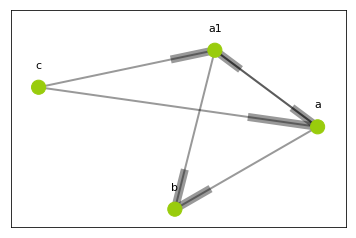

{'b': array([0.47788192, 0.        ]),
 'c': array([0.        , 0.76715714]),
 'a': array([0.97868893, 0.51815438]),
 'a1': array([0.61823615, 1.        ])}

In [12]:
pattern = nx.DiGraph()
pattern.add_node("a")
rule = Rule.from_transform(pattern)
_, rhs_clone = rule.inject_clone_node("a")
rhs_instance, rollback_commit = g.rewrite(rule, {"a": rhs_instance["a"]}, message="Clone a")
plot_graph(g.graph)

Create a new branch 'test'

In [13]:
g.branch("test")

'6a3e71b2-635a-464b-953f-6dbfa1450c61'

In this branch apply the rule that adds a new node 'd' and connects it with an edge to one of the cloned 'a' nodes

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


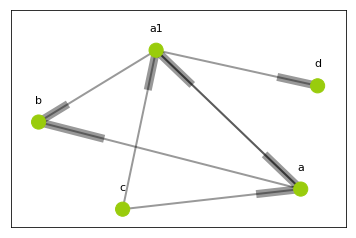

{'b': array([0.        , 0.54826033]),
 'c': array([0.29047662, 0.        ]),
 'a': array([0.90604251, 0.12649771]),
 'a1': array([0.40623, 1.     ]),
 'd': array([0.96445229, 0.77610112])}

In [14]:
pattern = nx.DiGraph()
pattern.add_node("a")
rule = Rule.from_transform(pattern)
rule.inject_add_node("d")
rule.inject_add_edge("a", "d")
g.rewrite(rule, {"a": rhs_instance[rhs_clone]}, message="Add d -> clone of a")
plot_graph(g.graph)

Switch back to 'master'

In [15]:
g.switch_branch("master")

Remove a node 'a'

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


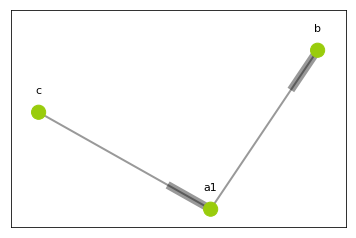

{'b': array([1.        , 0.80098165]),
 'c': array([0.        , 0.48845476]),
 'a1': array([0.61662618, 0.        ])}

In [16]:
pattern = nx.DiGraph()
pattern.add_node("a")
rule = Rule.from_transform(pattern)
rule.inject_remove_node("a")
rhs_instance, _ = g.rewrite(rule, {"a": rhs_instance["a"]}, message="Remove a")
plot_graph(g.graph)

Merge the branch 'dev' into 'master'

In [17]:
g.merge_with("dev")

'2f2e3533-3d0a-4648-8df2-47fa727e94ab'

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


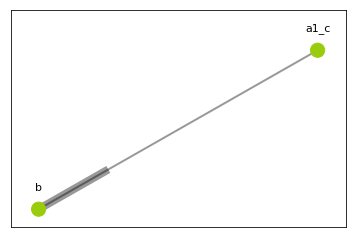

{'b': array([0., 0.]), 'a1_c': array([1.        , 0.87515328])}

In [18]:
plot_graph(g.graph)

Merge 'test' into 'master'

In [19]:
g.merge_with("test")

'ecd309db-2b1e-4ff5-a309-fbe34200f3f0'

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


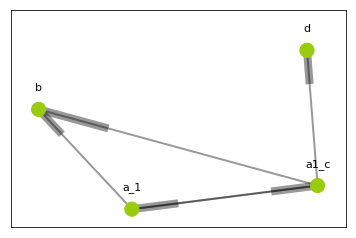

{'b': array([0.        , 0.60844508]),
 'a1_c': array([1.        , 0.14402478]),
 'd': array([0.96194445, 0.96916298]),
 'a_1': array([0.33434922, 0.        ])}

In [20]:
plot_graph(g.graph)

We can inspect the version control object in more details and look at its attribute `_revision_graph`, whose nodes represent the commits and whose edges represent graph deltas between different commits (basically, rewriting rules that constitute commits). Here we can see that on the nodes of the revision graph are stored branch names to which commits belong and user specified commit messages.

In [21]:
g.print_history()

2019-05-23 12:36:34.643466 d54fcb98-1f89-4610-95af-07b4936c16a6 master Initial commit
2019-05-23 12:36:34.652968 6f82e266-faf7-4900-be1d-6b2eb11523e4 master Add a -> b
2019-05-23 12:36:34.777743 43c587ed-383f-4fd0-b2c8-d79c86782c89 branch Created branch 'branch'
2019-05-23 12:36:35.016444 fd537064-6795-420b-9c5b-ac7d51e8f627 branch Clone b
2019-05-23 12:36:35.142615 8a8b83e3-834b-4d7c-b04b-8a8285de9d06 master Add c and c->a
2019-05-23 12:36:35.260409 468784d9-0311-4d45-a2c0-499d69d5ab04 dev Created branch 'dev'
2019-05-23 12:36:35.498989 be386dd5-c6b7-428f-8c64-088086fb6e61 dev Merge c and a
2019-05-23 12:36:35.623898 b5a06850-612a-4c41-ac22-3baab6615c75 master Clone a
2019-05-23 12:36:35.738239 6a3e71b2-635a-464b-953f-6dbfa1450c61 test Created branch 'test'
2019-05-23 12:36:35.761056 0b5922a9-2988-4047-a3c5-26c0f0ec04a3 test Add d -> clone of a
2019-05-23 12:36:35.895859 8c9ca902-cf24-4366-be7d-2cb3859cbc7c master Remove a
2019-05-23 12:36:36.051279 2f2e3533-3d0a-4648-8df2-47fa727e94a

Now we can rollback to some previous commit (commit where we first cloned the node 'a')

In [22]:
g.rollback(rollback_commit)

Created the new head for 'dev'
Created the new head for 'master'


/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Branches:  ['master', 'branch', 'dev']
Current branch 'master'
Updated revision graph:
2019-05-23 12:36:34.643466 d54fcb98-1f89-4610-95af-07b4936c16a6 master Initial commit
2019-05-23 12:36:34.652968 6f82e266-faf7-4900-be1d-6b2eb11523e4 master Add a -> b
2019-05-23 12:36:34.777743 43c587ed-383f-4fd0-b2c8-d79c86782c89 branch Created branch 'branch'
2019-05-23 12:36:35.016444 fd537064-6795-420b-9c5b-ac7d51e8f627 branch Clone b
2019-05-23 12:36:35.142615 8a8b83e3-834b-4d7c-b04b-8a8285de9d06 master Add c and c->a
2019-05-23 12:36:35.260409 468784d9-0311-4d45-a2c0-499d69d5ab04 dev Created branch 'dev'
2019-05-23 12:36:35.498989 be386dd5-c6b7-428f-8c64-088086fb6e61 dev Merge c and a
2019-05-23 12:36:35.623898 b5a06850-612a-4c41-ac22-3baab6615c75 master Clone a
Current graph object


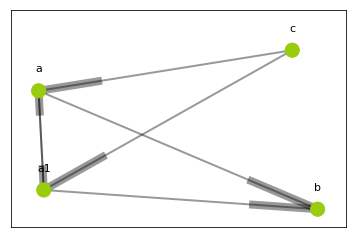


Nodes:

b  :  {}
a1  :  {}
a  :  {}
c  :  {}

Edges:

a1 -> b  :  {}
a1 -> a1  :  {}
a1 -> a  :  {}
a -> a  :  {}
a -> b  :  {}
a -> a1  :  {}
c -> a  :  {}
c -> a1  :  {}


In [23]:
print("Branches: ", g.branches())
print("Current branch '{}'".format(g.current_branch()))
print("Updated revision graph:")
g.print_history()
print("Current graph object")
plot_graph(g.graph)
print_graph(g.graph)

In [24]:
g.switch_branch("branch")

In [25]:
g.rollback(branch_commit)

Created the new head for 'branch'


In [26]:
g.print_history()

2019-05-23 12:36:34.643466 d54fcb98-1f89-4610-95af-07b4936c16a6 master Initial commit
2019-05-23 12:36:34.652968 6f82e266-faf7-4900-be1d-6b2eb11523e4 master Add a -> b
2019-05-23 12:36:34.777743 43c587ed-383f-4fd0-b2c8-d79c86782c89 branch Created branch 'branch'
2019-05-23 12:36:35.142615 8a8b83e3-834b-4d7c-b04b-8a8285de9d06 master Add c and c->a
2019-05-23 12:36:35.260409 468784d9-0311-4d45-a2c0-499d69d5ab04 dev Created branch 'dev'
2019-05-23 12:36:35.498989 be386dd5-c6b7-428f-8c64-088086fb6e61 dev Merge c and a
2019-05-23 12:36:35.623898 b5a06850-612a-4c41-ac22-3baab6615c75 master Clone a


{'master': 'b5a06850-612a-4c41-ac22-3baab6615c75', 'branch': '43c587ed-383f-4fd0-b2c8-d79c86782c89', 'dev': 'be386dd5-c6b7-428f-8c64-088086fb6e61'}


/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


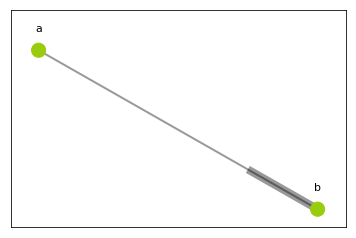

{'a': array([0., 1.]), 'b': array([0.37826442, 0.        ])}

In [27]:
print(g._heads)
plot_graph(g.graph)

In [28]:
g.switch_branch("master")

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


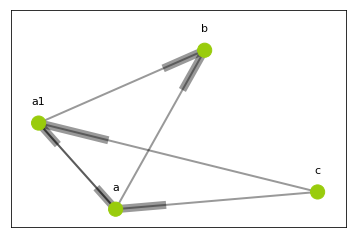

{'a': array([0.26305088, 0.        ]),
 'b': array([0.56701774, 1.        ]),
 'a1': array([0.        , 0.54180276]),
 'c': array([0.95268918, 0.10844235])}

In [29]:
plot_graph(g.graph)

In [30]:
g.merge_with("branch")

'02607206-45f4-4806-918f-38461fae75a8'

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


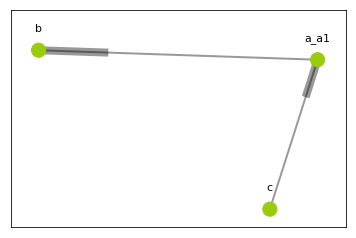

{'b': array([0.        , 0.92221002]),
 'c': array([0.82891523, 0.        ]),
 'a_a1': array([1.        , 0.86708527])}

In [31]:
plot_graph(g.graph)